<a href="https://colab.research.google.com/github/BumaranChe/Unsupervised_Machine_Learning_using_DBSCAN_GRADIO/blob/main/DBSCAN(GRADIO)_Sleep_Disorder_DataSet(GitHub).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#In this example we are going to look into whether the patient have sleep disorder or not. In this example, we will use DBSCAN to identify sleep disorder patterns. We will be using GRADIO as user interface.

# 1.0 Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# 2.0 Upload Dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset_Unsupervised Data - Sleep_health_and_lifestyle_dataset.csv")

In [3]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000
...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000


In [4]:
type(df)

pandas.core.frame.DataFrame

# 3.0 Organize and clean data

In [5]:
def pressure(Blood_Pressure):
  try:
    Blood_Pressure = Blood_Pressure.strip()

    diastolic,systolic = (Blood_Pressure.split('/')+[Blood_Pressure])[:2] #split into diastolic and systolic, in the case where is no (/), it add Blood_pressure, it returns a list, then slice the first 2 elements

    return float(diastolic.strip()),float(systolic.strip())
  except (ValueError,AttributeError):#If there is an error in the dataset , we add none value inside the cell
    return None,None

#Create a new column, apply the function

df[['Systolic_Pressure', 'Diastolic_Pressure']] = df['Blood Pressure'].apply(lambda x: pd.Series(pressure(x)))# the funcrion pressure is called, for each x values in Blood_Pressure, pressure(x) return a list with 2 values,then assign it into 2 new columns Systolic_Pressure and DIastoic_Pressure

In [6]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Systolic_Pressure,Diastolic_Pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,140.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,140.0,95.0
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,140.0,95.0
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,140.0,95.0
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,140.0,95.0


In [7]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [8]:
Occupation_map={
    "Software Engineer": 0,
    "Doctor": 1,
    "Sales Representative": 2,
    "Teacher": 3,
    "Nurse": 4,
    "Engineer": 5,
    "Accountant": 6,
    "Scientist": 7,
    "Lawyer": 8,
    "Salesperson": 9,
    "Manager": 10
}
df['Occupation']=df['Occupation'].map(Occupation_map)

In [9]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [10]:
BMI_map={
    "Overweight": 0,
    "Normal": 1,
    "Obese": 2,
    "Normal Weight": 3
}
df['BMI Category']=df['BMI Category'].map(BMI_map)

In [11]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
Gender_map={
    "Male": 0,
    "Female": 1
}
df['Gender']=df['Gender'].map(Gender_map)

In [13]:
df = df.drop(columns=['Blood Pressure'])

In [14]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic_Pressure,Diastolic_Pressure
0,1,0,27,0,6.1,6,42,6,0,77,4200,126.0,83.0
1,2,0,28,1,6.2,6,60,8,1,75,10000,125.0,80.0
2,3,0,28,1,6.2,6,60,8,1,75,10000,125.0,80.0
3,4,0,28,2,5.9,4,30,8,2,85,3000,140.0,90.0
4,5,0,28,2,5.9,4,30,8,2,85,3000,140.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,1,59,4,8.1,9,75,3,0,68,7000,140.0,95.0
370,371,1,59,4,8.0,9,75,3,0,68,7000,140.0,95.0
371,372,1,59,4,8.1,9,75,3,0,68,7000,140.0,95.0
372,373,1,59,4,8.1,9,75,3,0,68,7000,140.0,95.0


In [15]:
df = df.drop(columns=['Person ID'])

In [16]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic_Pressure,Diastolic_Pressure
0,0,27,0,6.1,6,42,6,0,77,4200,126.0,83.0
1,0,28,1,6.2,6,60,8,1,75,10000,125.0,80.0
2,0,28,1,6.2,6,60,8,1,75,10000,125.0,80.0
3,0,28,2,5.9,4,30,8,2,85,3000,140.0,90.0
4,0,28,2,5.9,4,30,8,2,85,3000,140.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,59,4,8.1,9,75,3,0,68,7000,140.0,95.0
370,1,59,4,8.0,9,75,3,0,68,7000,140.0,95.0
371,1,59,4,8.1,9,75,3,0,68,7000,140.0,95.0
372,1,59,4,8.1,9,75,3,0,68,7000,140.0,95.0


# 4.0 Standardize data

In [17]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# 5.0 Apply DBSCAN

In [18]:
dbscan = DBSCAN(eps=0.5, min_samples=5)#In this case study we will skip the Nearest Neighbours and set the min sample
labels = dbscan.fit_predict(data_scaled)

# 6.0 Add labels to DataFrame

In [19]:
df = df[['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps', 'Systolic_Pressure', 'Diastolic_Pressure']]
#df.columns=df.columns.str.replace(' ','_')
df['cluster'] = labels

In [20]:
df.head(30)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic_Pressure,Diastolic_Pressure,cluster
0,0,27,0,6.1,6,42,6,0,77,4200,126.0,83.0,-1
1,0,28,1,6.2,6,60,8,1,75,10000,125.0,80.0,-1
2,0,28,1,6.2,6,60,8,1,75,10000,125.0,80.0,-1
3,0,28,2,5.9,4,30,8,2,85,3000,140.0,90.0,-1
4,0,28,2,5.9,4,30,8,2,85,3000,140.0,90.0,-1
5,0,28,0,5.9,4,30,8,2,85,3000,140.0,90.0,-1
6,0,29,3,6.3,6,40,7,2,82,3500,140.0,90.0,-1
7,0,29,1,7.8,7,75,6,1,70,8000,120.0,80.0,0
8,0,29,1,7.8,7,75,6,1,70,8000,120.0,80.0,0
9,0,29,1,7.8,7,75,6,1,70,8000,120.0,80.0,0


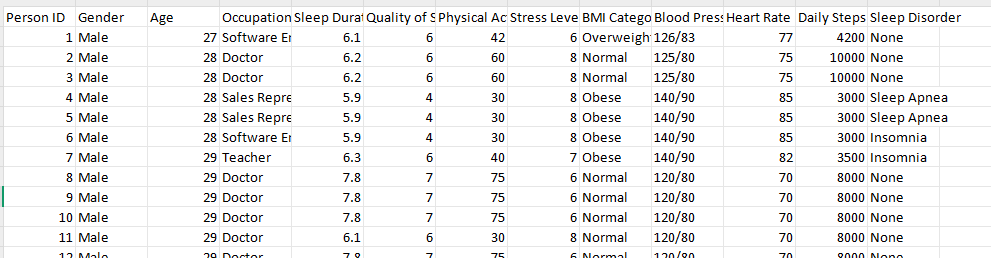

# 7.0 Install GRADIO

In [21]:
pip install gradio

# 8.0 Create a function to take in new input

In [22]:
def predict_sleep_disorder(Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Systolic_Pressure,Diastolic_Pressure):
  new_point = np.array([[Gender, Age, Occupation, Sleep_Duration, Quality_of_Sleep, Physical_Activity_Level, Stress_Level, BMI_Category, Heart_Rate, Daily_Steps, Systolic_Pressure, Diastolic_Pressure]])#Take in the new data point
  new_point_scaled = scaler.transform(new_point)#Stadardize the new data point
  label = dbscan.fit_predict(np.vstack([data_scaled,new_point_scaled]))[-1]#Stack the exisiting data with the new data used for training and the new point to classify
  return "Outlier" if label == -1 else f"Cluster {label}"

# 9.0 Import GRADIO

In [23]:
import gradio as gr

# 10. Launch GRADIO

In [24]:
demo = gr.Interface(fn = predict_sleep_disorder,
                    inputs=[
                        gr.Number(label='Gender'),
                        gr.Number(label='Age'),
                        gr.Number(label='Occupation'),
                        gr.Number(label='Sleep Duration'),
                        gr.Number(label='Quality of Sleep'),
                        gr.Number(label='Physical Activity Level'),
                        gr.Number(label='Stress Level'),
                        gr.Number(label='BMI Category'),
                        gr.Number(label='Heart Rate'),
                        gr.Number(label='Daily Steps'),
                        gr.Number(label='Systolic_Pressure'),
                        gr.Number(label='Diastolic_Pressure')
                    ],
                    outputs = 'text',
                    title = "Sleep DIsorder DBSCAN",
                    description='Enter the values to predict if the patient is with sleep disorder or not')

demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9d055e1c639f47cce7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
